
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 40</p>
## <p style="text-align: center;">Due: Wed, October 4th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Bias-variance Tradeoff (2pts)
How does the choice of K in the K-nearest neighbor classifier reflect a bias-variance tradeoff?

## Answer

# Question 2: Data Exploration and Regression Analysis (4+3+4+4=15pts)

Consider the dataset provided (russett_full_v2.csv) about agricultural inequality, industrial development and political instability in different countries. More information about it can be found [here](https://www.rdocumentation.org/packages/plspm/versions/0.4.9/topics/russett) though the data itself is slightly different than that referenced in the link.

a) (4 points) Generate box-plots of the "rent" (% of farmers that rent all their land), "inst" (measure of political stability in the executive branch), "ecks" (number of violent internal war incidents ) and "demo_score" ( derived measure of the level of a country's democracy from 1945 to 61 ) and identify the cutoff values for outliers.

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data=pd.read_csv('russett_full_v2.csv')


In [3]:
data.columns.values

array(['country', 'gini', 'farm', 'rent', 'gnpr', 'labo', 'inst', 'ecks',
       'death', 'demo_class', 'demo_score'], dtype=object)

{'boxes': [<matplotlib.lines.Line2D at 0xa613898>],
 'caps': [<matplotlib.lines.Line2D at 0xa6225c0>,
 'fliers': [<matplotlib.lines.Line2D at 0xa78d668>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xa78d0f0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xa6139e8>,
  <matplotlib.lines.Line2D at 0xa622048>]}

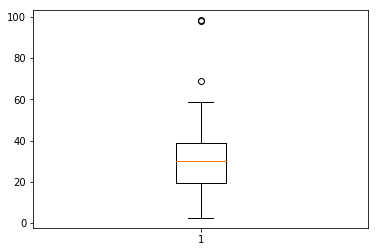

In [6]:
plt.boxplot(data['rent'])

[13.0, 22.600000000000001]

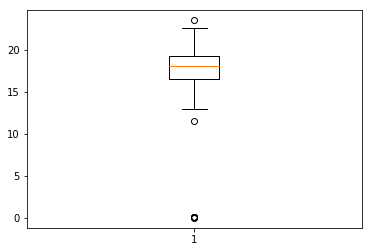

In [32]:
B=plt.boxplot(data['inst'])
[item.get_ydata()[0] for item in B['caps']]

[0.0, 47.0]

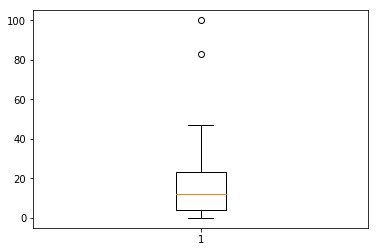

In [33]:
B=plt.boxplot(data['ecks'])
[item.get_ydata()[0] for item in B['caps']]

[0.0, 98.0]

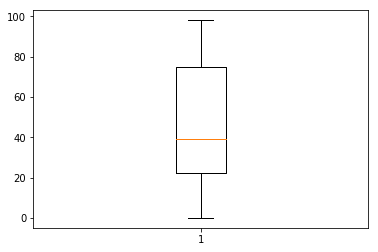

In [31]:
B=plt.boxplot(data['demo_score'])
[item.get_ydata()[0] for item in B['caps']]

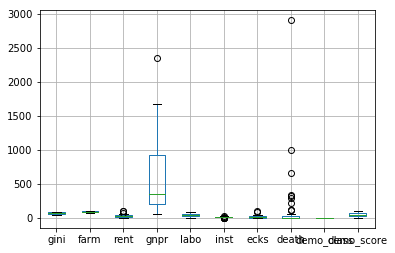

In [15]:
_, bp = pd.DataFrame.boxplot(data, return_type='both')

outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]

Generate 3 scatterplots of "rent" against "demo_score", "inst" against "demo_score" and "ecks" against "demo_score" with the identified outliers colored differently than non-outliers in each; comment on how inclusion of the outliers would affect a predictive model for the "demo_score" response. 

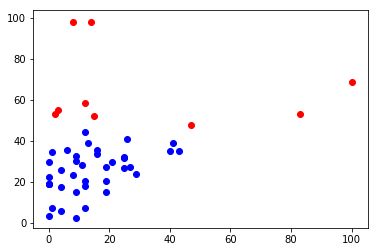

In [45]:
import numpy as np
x=np.array(data['ecks'])
y=np.array(data['rent'])
fig=plt.figure()
ax=fig.add_subplot(111)
# plot points inside distribution's width
ax.scatter(x[np.abs(y)<=47], y[np.abs(y)<47], color="blue")
# plot points outside distribution's width
ax.scatter(x[np.abs(y)>47], y[np.abs(y)>47], color="red")
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

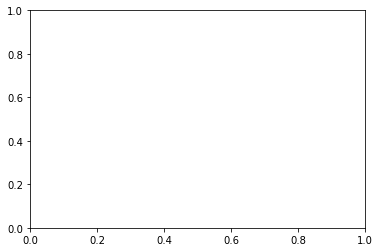

In [51]:
import numpy as np
x=np.array(data['inst'])
y=np.array(data['rent'])
fig=plt.figure()
ax=fig.add_subplot(111)
# plot points inside distribution's width
ax.scatter(x[np.abs(y)<=22.6 and np.abs(y)>=13 ], y[np.abs(y)<=22.6 and np.abs(y)>=13], color="blue")
# plot points outside distribution's width
ax.scatter(x[np.abs(y)>22.6 or np.abs(y)<13], y[np.abs(y)>22.6 or np.abs(y)<13], color="red")
plt.show()

b) (3 points) Let us try to fit an MLR, using ordinary least squares, to this dataset with "demo_score" as the dependent variable using only the predictors 'rent','inst', and 'ecks' . 

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=22)   

Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

In [59]:
Y=np.array(data['demo_score'])
X=np.array(data[['rent','inst','ecks']])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=22)

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
Y_train

array([33,  6, 31, 75, 37, 19, 29, 55, 81, 39, 78, 52, 73, 81,  0, 54, 33,
        5, 26, 57, 27, 19, 95, 68, 97, 54,  0, 85, 12, 35, 11, 19], dtype=int64)

In [69]:
train_predict=reg.predict(X_train)
sqrt(mean_squared_error(Y_train,train_predict))

25.781460397031786

In [70]:
test_predict=reg.predict(X_test)
sqrt(mean_squared_error(Y_test,test_predict))

32.5806718030383

c) (4 points ) Try to predict ”demo_score” using a robust regression using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.

In [72]:
huber_reg=linear_model.HuberRegressor(alpha=0)

In [73]:
huber_reg.fit(X_train,Y_train)

HuberRegressor(alpha=0, epsilon=1.35, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)

In [74]:
huber_train_predict=huber_reg.predict(X_train)
sqrt(mean_squared_error(Y_train,huber_train_predict))

26.83588175414388

In [75]:
huber_test_predict=huber_reg.predict(X_test)
sqrt(mean_squared_error(Y_test,huber_test_predict))

29.166380287179191

d) (4 points ) Compare and comment on the model fits obtained in (b) and (c) and plot the residual plots using all data for each model. How do outliers affect the relative performance of ordinary least squares regression, and robust regression with Huber loss in general? 

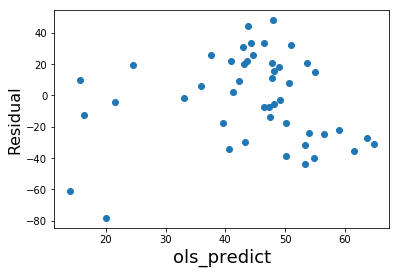

In [76]:
ols_predict=reg.predict(X)
ols_resid=ols_predict-Y
plt.scatter(ols_predict,ols_resid)
plt.xlabel('ols_predict', fontsize=18)
plt.ylabel('Residual', fontsize=16)

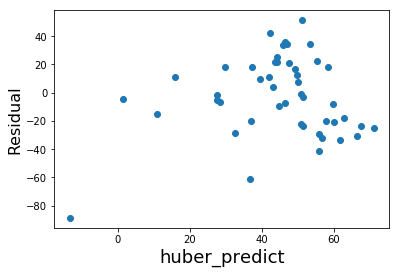

In [77]:
huber_predict=huber_reg.predict(X)
huber_resid=huber_predict-Y
plt.scatter(huber_predict,huber_resid)
plt.xlabel('huber_predict', fontsize=18)
plt.ylabel('Residual', fontsize=16)

# Question 3 - Sampling (4+4=8pts)

1. NBC has come up with an extreme TV show, and each of its viewers either likes or hates it. (no middle ground here; we are in a “black and white age”). NBC wants to estimate what fraction p of its audience like the show by “randomly” calling n viewers and tallying their responses so as to estimate the true value of p to a fractional accuracy of within ±ε%, with a confidence of (1 − α) × 100%. For α = 0.10, ε = 0.03 (i.e. your answer will be $\hat{p}$ ± 0.03), what is the minimum value of n needed if true value (i) p = 0.5, (ii) p=0.25? 

2. Suppose for a certain value of p and choice of ε, you calculate that you will need 1000 samples for α = 0.02. You now decide to obtain a more accurate answer by either (i) reducing α to 0.01, keeping the same ε or by (ii) reducing ε by a factor of 2 from the original value, and increasing α to 0.05. In each case how many samples would you need now?

## Answer

# Question 4 - Principal Component Analysis (10 points)

Import the diabetes dataset as in Q1 and add the interaction variables.
You should have 65 variables and one target variable.

In [78]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

Next, use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to center and scale each feature as follows.

In [79]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X = stdScaler.fit_transform(X)

(a) Perform PCA using the sklearn [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) package.  Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  Refer to Figure 10.4 of JW for an example.  You may use the output attribute *explained variance ratio*. (3pts)

[ 10.77442017   5.92181736   5.15516894   4.20590987   3.35495155
   2.90296239   2.54033996   2.4807133    2.17436671   1.96051525
   1.86479562   1.73816827   1.39400862   1.28865555   1.20915075
   1.13113822   1.07173244   0.951783     0.90634593   0.85252091
   0.83032675   0.77569115   0.69661168   0.64895238   0.62898499
   0.60113542   0.59505465   0.53168205   0.52374031   0.50201896
   0.47141083   0.45109987   0.41446527   0.40840983   0.35031726
   0.31939532   0.29978675   0.28490519   0.26481604   0.24815274]
[ 0.16576031  0.09110488  0.07931029  0.06470631  0.05161464  0.04466096
  0.03908215  0.03816482  0.0334518   0.03016177  0.02868916  0.02674105
  0.02144629  0.01982547  0.01860232  0.01740213  0.01648819  0.01464282
  0.01394378  0.01311571  0.01277426  0.01193371  0.0107171   0.00998388
  0.00967669  0.00924824  0.00915469  0.00817972  0.00805754  0.00772337
  0.00725247  0.00694     0.00637639  0.00628323  0.0053895   0.00491377
  0.0046121   0.00438316  0.00407

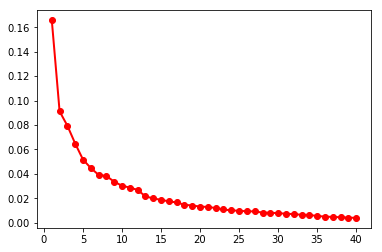

In [91]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=40)

pca.fit_transform(X)
print pca.explained_variance_
print pca.explained_variance_ratio_
print pca.explained_variance_ratio_.cumsum()
plt.plot(np.array(range(1,41)), pca.explained_variance_ratio_, 'ro-', linewidth=2)

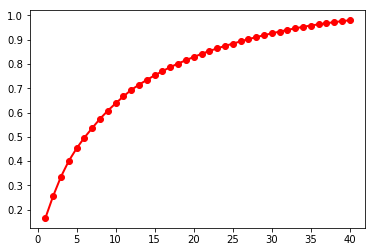

In [92]:
plt.plot(np.array(range(1,41)), pca.explained_variance_ratio_.cumsum(), 'ro-', linewidth=2)

(b) How many principal components (N1, N2, N3) are required to explain cumulative variance of 30%, 60%, and 90%, respectively? (3pts)

3,9,27

(c) Fit an ordinary least squares linear regression using N1, N2, and N3 number of principal components, respectively. (This is called Principal Components Regression) Use entire dataset, e.g. 442 rows. Evaluate the models using mean squared error (MSE). (4pts)

## Answer

# Question 5 -  Feature Selection ( 5 points )

Explain what you understand by the two wrapper methods for feature selection (forward and backward selection) (no more than 1 paragraph). 
